In [1]:
import geopandas as gpd
from sqlalchemy import create_engine

In [2]:
path = 'X:/Projects/RLID/BusinessData/InfoUSA/2020/June/Geocoded.gdb'

In [3]:
business = gpd.read_file(path, layer="June2020")

In [4]:
type(business)

geopandas.geodataframe.GeoDataFrame

In [5]:
list(business)

['RLID_Business_dbo_BUSINESS_business_name',
 'RLID_Business_dbo_BUSINESS_business_desc',
 'RLID_Business_dbo_BUSINESS_address',
 'RLID_Business_dbo_BUSINESS_city',
 'RLID_Business_dbo_BUSINESS_state',
 'RLID_Business_dbo_BUSINESS_zip',
 'RLID_Business_dbo_BUSINESS_zip_plus4',
 'RLID_Business_dbo_BUSINESS_zip_full',
 'RLID_Business_dbo_BUSINESS_county',
 'RLID_Business_dbo_BUSINESS_carrier_route',
 'RLID_Business_dbo_BUSINESS_delivery_point_bar_code',
 'RLID_Business_dbo_BUSINESS_neighborhood',
 'RLID_Business_dbo_BUSINESS_phone',
 'RLID_Business_dbo_BUSINESS_phone_toll_free',
 'RLID_Business_dbo_BUSINESS_fax',
 'RLID_Business_dbo_BUSINESS_website',
 'RLID_Business_dbo_BUSINESS_primary_sic_code',
 'RLID_Business_dbo_BUSINESS_primary_sic_desc',
 'RLID_Business_dbo_BUSINESS_sic_code_1',
 'RLID_Business_dbo_BUSINESS_sic_code_1_desc',
 'RLID_Business_dbo_BUSINESS_sic_code_2',
 'RLID_Business_dbo_BUSINESS_sic_code_2_desc',
 'RLID_Business_dbo_BUSINESS_sic_code_3',
 'RLID_Business_dbo_BUSINE

In [6]:
business.RLID_Business_dbo_BUSINESS_primary_naics_desc.unique()

array(['Residential Remodelers', 'Automotive Parts & Accessories Stores',
       'Other Individual & Family Services',
       'Lessors Of Miniwarehouses & Self-Storage Units',
       'Full-Service Restaurants',
       'Supermarkets/Other Grocery (Exc Convenience) Strs',
       'Offices Of Real Estate Agents & Brokers',
       'Lessors Of Residential Buildings & Dwellings',
       'All Other Specialty Food Stores',
       'Computer Systems Design Services',
       'New Single-Family Hsng Constr (Exc For-Sale Bldrs)',
       'Miscellaneous Intermediation', 'Unclassified Establishments',
       'Architectural Services', 'Roofing Contractors',
       'Process, Physical Distr/Logistics Consulting Svcs',
       'Lessors-Nonresidential Bldgs (Exc Miniwarehouses)',
       'Convenience Stores', 'Dental Laboratories',
       'Coin-Operated Laundries & Drycleaners',
       'Other Snack Food Manufacturing', 'Meat Markets',
       'Other Gasoline Stations', 'General Warehousing & Storage',
       '

In [7]:
business.RLID_Business_dbo_BUSINESS_naics_industry_desc.unique()

array(['Construction (23)', 'Retail Trade (44-45)',
       'Health Care and Social Assistance (62)',
       'Real Estate Rental and Leasing (53)',
       'Accommodation and Food Services (72)',
       'Professional / Scientific / Technical Services (54)',
       'Finance and Insurance (52)', None, 'Manufacturing (31-33)',
       'Other Services except Public Administration (81)',
       'Transportation and Warehousing (48-49)',
       'Administrative and Support and Waste Management and Remediation Services (56)',
       'Information (51)', 'Wholesale Trade (42)',
       'Educational Services (61)', 'Public Administration (92)',
       'Arts / Entertainment / Recreation (71)',
       'Agriculture / Forestry / Fishing and Hunting (11)',
       'Management of Companies and Enterprises (55)', 'Utilities (22)',
       'Mining (21)'], dtype=object)

In [8]:
# list all the retail types
business[business['RLID_Business_dbo_BUSINESS_naics_industry_desc']==
         'Retail Trade (44-45)']['RLID_Business_dbo_BUSINESS_primary_naics_desc'].unique()

array(['Automotive Parts & Accessories Stores',
       'Supermarkets/Other Grocery (Exc Convenience) Strs',
       'All Other Specialty Food Stores', 'Convenience Stores',
       'Meat Markets', 'Other Gasoline Stations',
       'Gift, Novelty & Souvenir Stores',
       'Motorcycle, Atv & All Other Motor Vehicle Dealers',
       'All Other Misc Store Retailers (Exc Tobacco Strs)',
       'Boat Dealers', 'Art Dealers', 'Other Building Material Dealers',
       'Used Merchandise Stores', 'Electronic Stores', 'Jewelry Stores',
       'Sporting Goods Stores', 'Men s Clothing Stores',
       'Clothing Accessories Stores', 'Hobby, Toy & Game Stores',
       'All Other Health & Personal Care Stores',
       'Household Appliance Stores', 'Book Stores',
       'All Other General Merchandise Stores', 'Used Car Dealers',
       'Pet & Pet Supplies Stores', 'Recreational Vehicle Dealers',
       'Outdoor Power Equipment Stores', 'Furniture Stores',
       'Pharmacies & Drug Stores', 'All Other Hom

In [9]:
selected_retail = ['Supermarkets/Other Grocery (Exc Convenience) Strs', 
                   'Pharmacies & Drug Stores']

In [10]:
selected_cols = ['RLID_Business_dbo_BUSINESS_business_name', 
                 'RLID_Business_dbo_BUSINESS_longitude',
                 'RLID_Business_dbo_BUSINESS_latitude',
                 'RLID_Business_dbo_BUSINESS_primary_naics_desc',
                 'geometry']

In [11]:
essential_retail = business[business.RLID_Business_dbo_BUSINESS_primary_naics_desc.isin(selected_retail)][selected_cols]

In [12]:
type(essential_retail)

geopandas.geodataframe.GeoDataFrame

In [13]:
essential_retail = essential_retail.rename(
  columns={
    'RLID_Business_dbo_BUSINESS_business_name': 'name',
    'RLID_Business_dbo_BUSINESS_longitude': 'longitude',
    'RLID_Business_dbo_BUSINESS_latitude': 'latitude',
    'RLID_Business_dbo_BUSINESS_primary_naics_desc': 'type'
  }
)

In [14]:
essential_retail.head()

,name,longitude,latitude,type,geometry
5,13th Avenue Market,-123.098641,44.045380,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (4238072.841 877550.394)
411,Albertsons,-123.116844,44.040451,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (4233307.806 876280.573)
412,Albertsons,-123.081479,44.023751,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (4242520.518 869339.365)
413,Albertsons,-123.074007,44.064821,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (4244821.395 884356.736)
414,Albertsons,-123.179108,44.068726,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (4217130.088 886718.848)


In [15]:
essential_retail = essential_retail.rename(
    columns={'geometry': 'geom'}).set_geometry('geom')

In [16]:
engine = create_engine(   
"mssql+pyodbc:///?odbc_connect="
"Driver%3D%7BODBC+Driver+17+for+SQL+Server%7D%3B"
"Server%3Drliddb.int.lcog.org%2C5433%3B"
"Database%3DRLIDGeo%3B"
"Trusted_Connection%3Dyes%3B"
"ApplicationIntent%3DReadWrite%3B"
"WSID%3Dclwrk4087.int.lcog.org%3B")

In [17]:
sql = '''
SELECT 
label_full AS name,
longitude,
latitude,
type_full AS type,
Shape.STAsBinary() AS geom
FROM dbo.Facility;
'''

In [18]:
facility = gpd.GeoDataFrame.from_postgis(sql, engine, geom_col='geom')

In [19]:
type(facility)

geopandas.geodataframe.GeoDataFrame

In [20]:
facility.head()

,name,longitude,latitude,type,geom
0,Deadwood Creek Fire Station,-123.729353,44.140081,Fire Station,POINT (4073655.247 917816.689)
1,Swisshome-Deadwood Fire District Station 1,-123.733814,44.096571,Fire Station,POINT (4071872.603 902011.648)
2,Swisshome-Deadwood Fire District Station 2,-123.800733,44.057599,Fire Station,POINT (4053744.947 888501.170)
3,Mapleton Fire Station,-123.863540,44.036398,Fire Station,POINT (4036936.164 881435.189)
4,Mapleton High School,-123.855157,44.036167,High School,POINT (4039135.618 881262.722)


In [21]:
selected_facility = ['High School', 'Middle School', 'Elementary Sch', 'City Hall', 
                     'Community Cntr', 'Post Office',  'LTD Park & Ride', 'Hospital',
                     'LTD Transit Sta', 'Library', 'Recreation',  'Park', 'University',
                     'Clinic', 'Museum',  'Beach Access' 'Bike Share Hub', 'Social Services']

In [22]:
facility['type'].unique()

array(['Fire Station', 'High School', 'Middle School', 'Elementary Sch',
       'Treatment', 'Wastewater', 'ElementaryCLSD', 'City Hall',
       'Reservoir', 'Community Cntr', 'Post Office', 'Jail',
       'School Dist Off', 'Pub Charter Sch', 'Golf Course',
       'LTD Park & Ride', 'Hospital', 'Public Works Sh',
       '911 Comm.Center', 'Alternative Sch', 'Shopping Center',
       'LTD Transit Sta', 'Library', 'Recreation', 'Transportation',
       'Water Pump Sta.', 'Police Station', 'Park', 'University',
       'Police Sta/Comm', 'Clinic', 'Museum', 'Grange', 'Airport',
       'Winery', 'The Arts', 'Boat Ramp', 'Beach Access', 'Dunes NRA',
       'Dam', 'Solid Waste Tfr', 'US Courthouse', 'Campground',
       'Private School', 'Port Office', 'Animal Shelter', 'Landfill',
       'Fish Hatchery', 'Co. Courthouse', 'Government Office',
       'Landing Zone', 'Public Utility', 'Covered Bridge',
       'Ranger Station', 'Retirement Ctr', 'Care Facility',
       'Senior Mfd Park', 'Powe

In [23]:
facility = facility[facility['type'].isin(selected_facility)]

In [24]:
essential_retail.crs

<Projected CRS: EPSG:2914>
Name: NAD83(HARN) / Oregon South (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon - counties of Coos; Crook; Curry; Deschutes; Douglas; Harney; Jackson; Josephine; Klamath; Lake; Lane; Malheur.
- bounds: (-124.6, 41.98, -116.9, 44.56)
Coordinate Operation:
- name: SPCS83 Oregon South zone (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [25]:
facility.crs = "EPSG:2914"

In [26]:
service_stops = facility.append(essential_retail)

In [27]:
service_stops.head()

,name,longitude,latitude,type,geom
4,Mapleton High School,-123.855157,44.036167,High School,POINT (4039135.618 881262.722)
5,Mapleton Middle School,-123.854778,44.035560,Middle School,POINT (4039226.570 881037.674)
6,Mapleton Elementary School,-123.853470,44.036400,Elementary Sch,POINT (4039582.333 881329.826)
7,Siuslaw High School,-124.106058,43.992038,High School,POINT (3972516.819 867932.308)
9,Siuslaw Middle School,-124.104696,43.988633,Middle School,POINT (3972821.359 866676.781)


In [28]:
service_stops.tail()

,name,longitude,latitude,type,geom
14583,Whole Foods Market,-123.087166,44.050671,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (4240995.932 879287.022)
14600,Wild West G Inc,-123.164916,44.042966,Pharmacies & Drug Stores,POINT (4221179.893 877513.409)
14666,Willamette Street Market,-123.092552,44.048035,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (4239692.594 878430.493)
14735,Winco Foods,-123.169379,44.085962,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (4219973.572 893056.475)
14736,Winco Foods,-122.995991,44.060842,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (4265313.699 882446.024)


In [29]:
type(service_stops)

geopandas.geodataframe.GeoDataFrame

In [30]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Boundary.shp")

In [31]:
MPObd.head()

,Area,inside_mpo,is_in_mpo,geometry
0,125.303,Y,1,"POLYGON ((4242301.670 919296.949, 4246345.597 ..."


In [32]:
pip = service_stops.within(MPObd.loc[0, 'geometry'])

In [33]:
mpo_service_stops = service_stops.loc[pip].copy()

In [34]:
mpo_service_stops.head()

,name,longitude,latitude,type,geom
59,Coburg City Hall,-123.067629,44.139154,City Hall,POINT (4247265.297 911467.635)
116,LTD Park & Ride St. Matthew’s Episcopal Church,-123.140940,44.122960,LTD Park & Ride,POINT (4227841.741 906165.181)
117,Awbrey Park Elementary School,-123.137966,44.123737,Elementary Sch,POINT (4228631.206 906423.566)
119,Madison Middle School,-123.119675,44.117052,Middle School,POINT (4233355.976 903837.097)
121,Spring Creek Elementary School,-123.144327,44.114781,Elementary Sch,POINT (4226858.611 903212.889)


In [35]:
import matplotlib.pyplot as plt
import contextily as ctx

In [36]:
mpo_service_stops['type'].unique()

array(['City Hall', 'LTD Park & Ride', 'Elementary Sch', 'Middle School',
       'Post Office', 'LTD Transit Sta', 'High School', 'Library',
       'Recreation', 'Hospital', 'Park', 'University', 'Clinic', 'Museum',
       'Community Cntr', 'Social Services',
       'Supermarkets/Other Grocery (Exc Convenience) Strs',
       'Pharmacies & Drug Stores'], dtype=object)

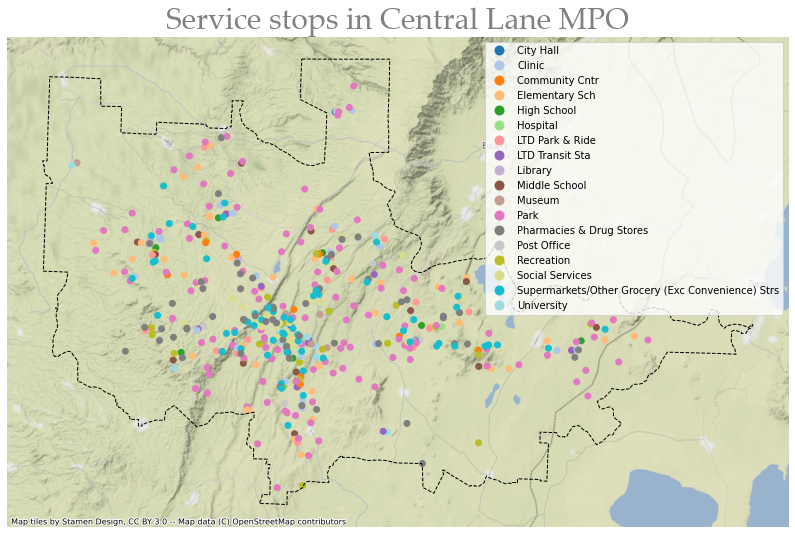

In [37]:
fig, ax = plt.subplots(figsize=(14, 12))
mpo_service_stops.plot(ax=ax, column='type', cmap='tab20', legend=True, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Service stops in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [38]:
outpath = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\PerformanceAnalysis'

In [39]:
import os

In [40]:
service_stops.to_file(os.path.join(outpath, "service_stops.shp"))